In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
m = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = m.load_data()

11493376/11490434 [==============================] - 0s 0us/step


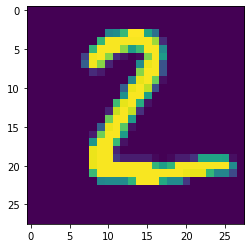

In [3]:
plt.imshow(x_test[1])

In [4]:
y_train[1]

0

In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_train[2]

4

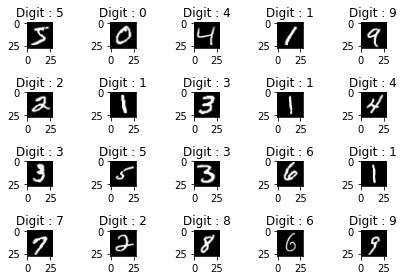

In [8]:
#fig = plt.figure()
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i],cmap='gray')
    plt.title("Digit : {}".format(y_train[i]))
    

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
img_rows = 28
img_cols = 28
if tf.keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('X_train shape:', x_train.shape) 

X_train shape: (60000, 28, 28, 1)


In [11]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [12]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
#x_train = tf.keras.utils.normalize(x_train,axis = 1)
#x_test = tf.keras.utils.normalize(x_test,axis = 1)

In [15]:
x_train.shape

(60000, 28, 28, 1)

In [16]:
input_shape

(28, 28, 1)

In [17]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape = input_shape))
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation = 'relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10,activation='softmax'))


In [18]:
model.compile(optimizer = tf.keras.optimizers.Adadelta(), loss = tf.keras.losses.categorical_crossentropy,metrics = ['accuracy'])

In [19]:
model_log = model.fit(x_train,y_train,batch_size = 128,epochs = 50,verbose = 1,validation_data = (x_test,y_test))

Epoch 1/50
469/469 [==============================] - 3s 6ms/step - loss: 2.2852 - accuracy: 0.1398 - val_loss: 2.2491 - val_accuracy: 0.3348
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 2.2296 - accuracy: 0.2501 - val_loss: 2.1812 - val_accuracy: 0.5271
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 2.1595 - accuracy: 0.3492 - val_loss: 2.0908 - val_accuracy: 0.6063
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 2.0642 - accuracy: 0.4290 - val_loss: 1.9688 - val_accuracy: 0.6576
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 1.9401 - accuracy: 0.4956 - val_loss: 1.8091 - val_accuracy: 0.7094
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 1.7856 - accuracy: 0.5470 - val_loss: 1.6163 - val_accuracy: 0.7449
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 1.6128 - accuracy: 0.5897 - val_loss: 1.4094 - val_accuracy: 0.7680
Epoch 

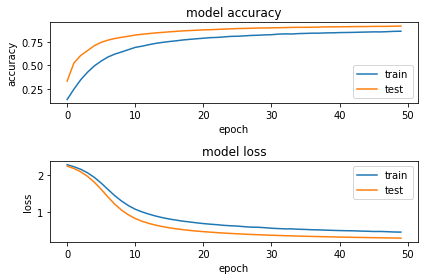

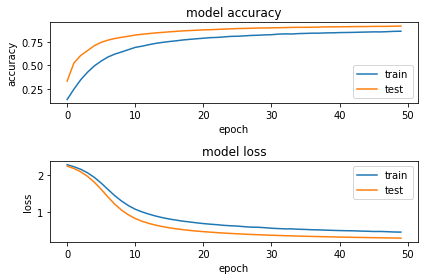

In [20]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

In [21]:
pred = model.predict(x_test)
pred

array([[1.18605232e-04, 1.20002114e-05, 4.11672954e-04, ...,
        9.96194601e-01, 1.50526059e-04, 2.66724778e-03],
       [1.38215488e-03, 2.07531906e-04, 9.86162603e-01, ...,
        1.43428394e-07, 1.52572489e-03, 7.79649383e-07],
       [1.92274537e-03, 9.59282815e-01, 5.95577387e-03, ...,
        4.77578724e-03, 1.24395331e-02, 3.69389844e-03],
       ...,
       [1.19670214e-04, 1.20119112e-04, 4.02073405e-04, ...,
        2.69612344e-03, 9.56608821e-03, 8.79114047e-02],
       [1.89449098e-02, 1.45801371e-02, 4.85081109e-04, ...,
        3.36374878e-03, 2.58580983e-01, 1.21873978e-03],
       [5.62402070e-04, 1.62207971e-06, 5.95314486e-04, ...,
        7.68769155e-07, 1.42529252e-05, 5.36027801e-06]], dtype=float32)

In [22]:
import numpy as np
np.argmax(pred[3])

0

In [23]:
x_test[3].shape

(28, 28, 1)

In [24]:
pred[0]

array([1.1860523e-04, 1.2000211e-05, 4.1167295e-04, 4.0552719e-04,
       1.1486205e-05, 2.0530910e-05, 7.7928180e-06, 9.9619460e-01,
       1.5052606e-04, 2.6672478e-03], dtype=float32)

In [42]:
pred_list = np.zeros(pred.shape) 

In [43]:
k = 0
for i in pred:
  pred_list[k][np.argmax(i)] = 1
  k+=1

In [44]:
pred_list

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2959 - accuracy: 0.9167


[0.29585519433021545, 0.916700005531311]

In [53]:
c = 0
for i in range(10000):
  if(np.argmax(y_test[i]) == np.argmax(pred_list[i])):
    c+=1
print(c)

9167


In [55]:
c/y_test.shape[0]

0.9167